In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('/content/appliance_energy.csv')

print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

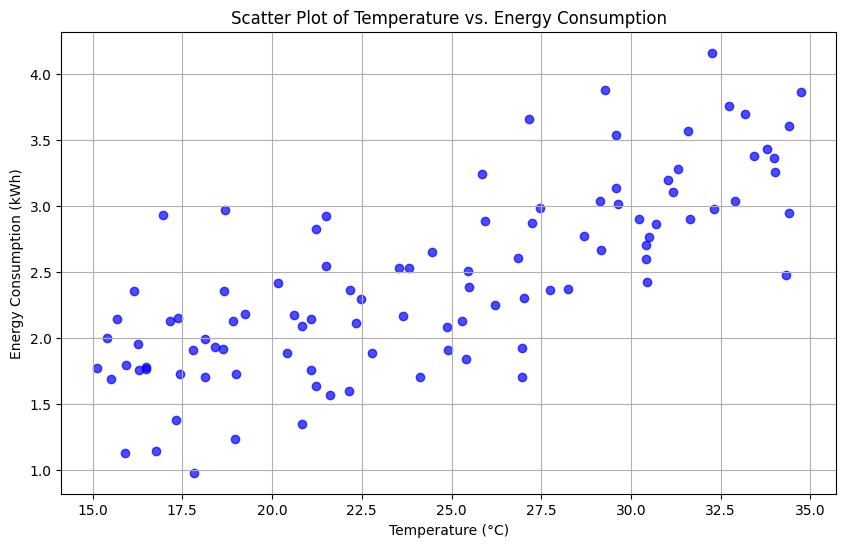

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))  # Set the figure size for better visualization
plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)'], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Scatter Plot of Temperature vs. Energy Consumption')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [6]:
print(df.isnull().sum())

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [24]:
X = df[['Temperature (°C)']]
y = df[['Energy Consumption (kWh)']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_test.head()

,Energy Consumption (kWh)
83,1.955394
53,3.037917
70,2.426014
45,2.370351
44,2.413076


In [29]:
print("Slope: ",model.coef_)
print("y-intercept: ",model.intercept_)

Slope:  [[0.08996618]]
y-intercept:  [0.22196392]


In [30]:
print(model.coef_*26.97+model.intercept_)

[[2.64835187]]


In [31]:
print(model.coef_*28.25+model.intercept_)

[[2.76350858]]


In [32]:
2.76350858-2.64835187

0.11515670999999994

In [33]:
y_pred=model.predict(X_test)

In [34]:
y_pred

array([[1.6858187 ],
       [3.18154068],
       [2.96097494],
       [2.76354868],
       [2.0370856 ],
       [2.36343345],
       [2.09711944],
       [3.12445907],
       [1.60849483],
       [2.24537556],
       [2.34866555],
       [2.66462648],
       [3.0387357 ],
       [3.27880886],
       [1.78664542],
       [1.85218469],
       [2.95922164],
       [1.70468695],
       [3.0692904 ],
       [1.87828475]])

In [36]:
mse=mean_squared_error  (y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:",mse)
print("R-squared:",r2)

Mean Squared Error: 0.16342487842925055
R-squared: 0.6119478445218713


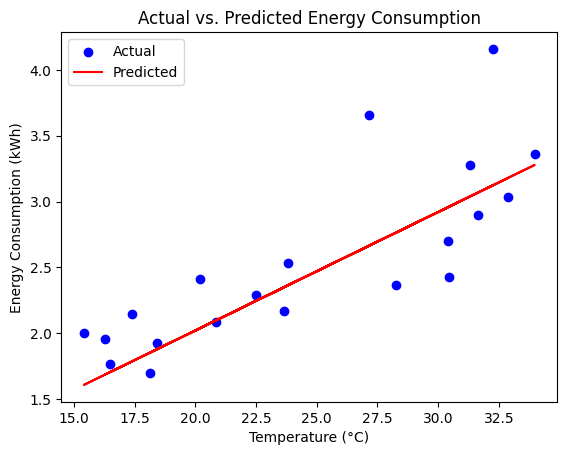

In [38]:
plt.scatter(X_test,y_test,color='blue',label='Actual')
plt.plot(X_test,y_pred,color='red',label='Predicted')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

In [39]:
import joblib
joblib.dump(model,'day 3 energy_consumption_model.pkl')

['day 3 energy_consumption_model.pkl']

In [40]:
import joblib
import pandas as pd


model = joblib.load('day 3 energy_consumption_model.pkl')

new_data = pd.DataFrame({'Temperature (°C)': [25, 30, 35]})

predictions = model.predict(new_data)


print(predictions)

[[2.47111849]
 [2.9209494 ]
 [3.37078032]]


In [44]:
import joblib

# Load the model from the file
model = joblib.load('day 3 energy_consumption_model.pkl')

# Example data for prediction
new_data = np.array([[22.49]])

# Make predictions
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

[[2.24530337]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
